In [11]:
from scipy.io import wavfile
import numpy as np
from librosa import istft, stft
import mir_eval

import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

# from utils import es as es
import pickle as pkl

from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank

In [4]:
data = pkl.load(open('example_spikes_sound18.pkl'))

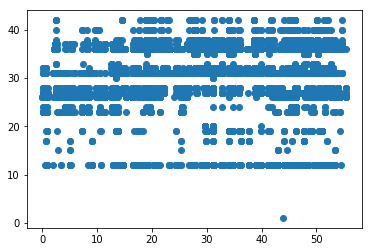

In [16]:
# plt.plot(data['ts'], data['ch'], '*')
# plt.plot(data['ts'][data['amax']==1], data['ch'][data['amax']==1], 'o')
plt.plot(data['ts'][data['amax']==8], data['ch'][data['amax']==8], 'o')


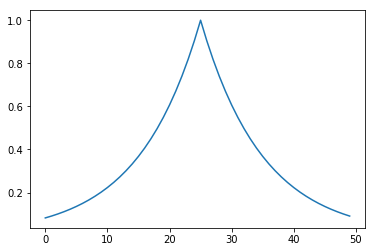

In [36]:
t = np.arange(-0.025, 0.025, 0.001)
l = 100
plt.plot( np.exp(-l * np.abs(t)))

In [77]:
# from collections import OrderedDict
# ts = data['ts']
# ch = data['ch'].astype('int32')

def wind_sp(ts, ch, w=0.001):
    ts_int = (ts // w).astype('int32')

    A = np.zeros((np.max(ts_int) + 1, max(list(set(ch))) + 1))

    for _t, _c in zip(ts_int, ch):
        A[_t, _c] += 1
    return A.T

In [192]:
def exp_feat(A, win=0.05):
    l = 300
    t = np.arange(-win, win, 0.001)
    b = np.exp(-l * np.abs(t)) / np.linalg.norm(np.exp(-l * np.abs(t)))

    AA = np.array([np.convolve(_a, b, 'same') for _a in A])
    return AA.T

(55459, 43)
(43, 55459)


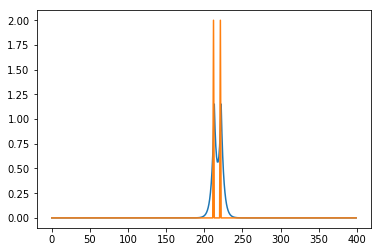

In [218]:
ts = data['ts'][data['amax']==8]
ch = data['ch'][data['amax']==8].astype('int32')

A = wind_sp(ts, ch)
X = exp_feat(A)

print X.shape
print A.shape
# plt.imshow(AA, aspect='auto')
plt.plot(X[:400, 28])
plt.plot(A[28, :400])

(5409, 26)


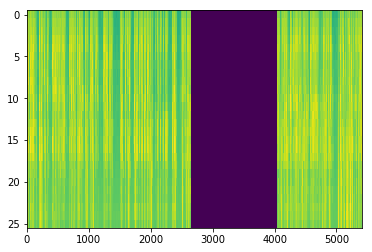

In [194]:
fs = 24000
sig = data['gt1']
mfcc_feat = mfcc(sig, fs, nfft=1024)
d_mfcc_feat = delta(mfcc_feat, 2)
Y = logfbank(sig, fs, nfft=1024)

plt.imshow(fbank_feat.T, aspect='auto')
print fbank_feat.shape

In [219]:
print X.shape
print Y.shape
x_train = X[:20000]
y_train = Y[:2000]

x_test = X[45000:50000]
y_test = Y[4500:5000]

print x_train.shape

ctx = 10 * 4
shift = 10
n_win = (x_train.shape[0] - ctx) // shift
xx_train = np.array([x_train[i:i + ctx].reshape(-1,) for i in range(0, n_win * shift, shift)])
n_win = (x_test.shape[0] - ctx) // shift
xx_test = np.array([x_test[i:i + ctx].reshape(-1,) for i in range(0, n_win * shift, shift)])

print xx_train.shape
print xx_test.shape



(55459, 43)
(5409, 26)
(20000, 43)
(1996, 1720)
(496, 1720)


In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = Ridge(alpha=1000)
lr.fit(xx_train, y_train[:len(xx_train)])
y_pred = lr.predict(xx_test[:len(xx_test)])
print y_pred.shape

(496, 26)


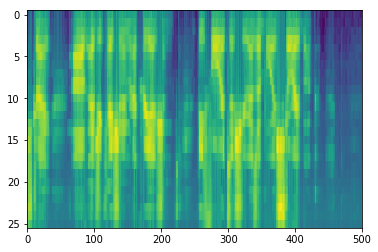

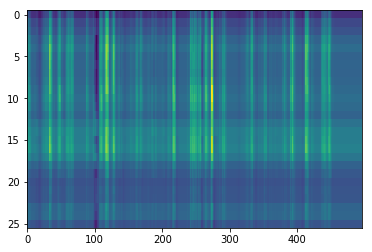

In [247]:
plt.figure()
plt.imshow(y_test.T, aspect='auto')
plt.figure()
plt.imshow(y_pred.T, aspect='auto')